In [ ]:
import numpy as np
import matplotlib.pylab as plt
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # exp 자연상수의 제곱을 쓸 때 쓰임


#3.신경망

계단함수 구현하기

이 함수는 단순하지만 부동소수점(실수)만 받아들인다. 따라서 넘파이 배열을 
받을 수는 없다

In [ ]:
def step_fucntion(x):
    if x > 0:
        return 1
    else:
        return 0


넘파이 배열도 받을 수 있는 함수

In [ ]:
def step_function(x):
    y = x > 0
    return y.astype(np.int) # astype(np.자료형) np배열의 자료형을 한번에 바꿔주는 함수 


In [ ]:
x = np.array([-1, 0, 1, -3, 2])
y = x > 0
print(y)

[False False  True False  True]


##계단함수의 그래프

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


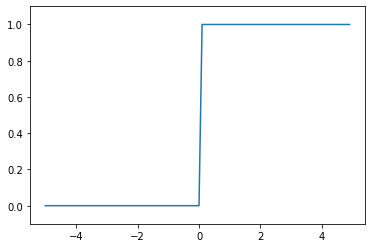

In [ ]:
import numpy as np 
import matplotlib.pylab as plt
def step_function(x):
    return np.array(x > 0, dtype=np.int)
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

##시그모이드 함수 

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # exp 자연상수의 제곱을 쓸 때 쓰임


In [ ]:
x = np.array([-1.0, 3, 4, -1.3])
print(sigmoid(x))

[0.26894142 0.95257413 0.98201379 0.21416502]


##브로드 케스트

장점:편리함

단점:어디서 틀렸는지 찾기 힘듬


In [ ]:
t = np.array([1.0, 2.0, 3.0])
print(t)
print(2.0 + t)
print(t / 3)

[1. 2. 3.]
[3. 4. 5.]
[0.33333333 0.66666667 1.        ]


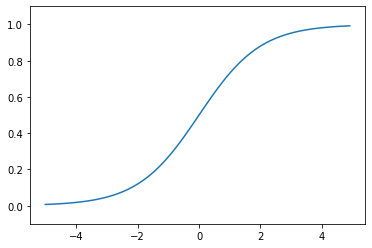

In [ ]:
x = np.arange(-5.0 , 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y) #x축 y축 값 지정
plt.ylim(-0.1, 1.1) #y축 범위 설정
plt.show()

##ReLU 함수

In [ ]:
def relu(x):
    return np.maximum(0, x)# maximum은 두 입력값중 큰 값을 선택해 반환하는 함수
    

다차원 배열의 계산

1차원 배열

In [ ]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A)) #차원이 몇차원인지 출력해주는 함수
print(A.shape) #배열의 형상을 '튜플'타입으로 확인해준다
print(A.shape[0])



[1 2 3 4]
(4,)
4


2차원 배열

In [ ]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


행렬의 곱

In [ ]:
A = np.array([[1, 2], [3, 4]]) 
print(A.shape)
B = np.array([[5, 6], [7, 8]])
print(B.shape)
print(np.dot(A, B)) #행렬 곱 계산


(2, 2)
(2, 2)
[[19 22]
 [43 50]]


신경망에서 행렬의 곱

In [ ]:
X = np.array([1, 2])
print(X.shape)
W = np.array([[1, 2, 3], [4, 5, 6]])
print(W.shape)
Y = np.dot(X, W)
print(Y)

(2,)
(2, 3)
[ 9 12 15]


## 신경망 구현하기

### 각 층의 신호전달 구현하기

2층 신경망 

처음의 노드가 2개 있고 은닉층 1개가 있는 구현

은닉층에서의 가중치의 합을 a로 표기하고 활성화 함수를 h()로 변환된 신호를 z로 표기한다. 

1층

In [ ]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
print(A1)

[0.3 0.7 1.1]


In [ ]:
Z1 = sigmoid(A1)

print(A1) 
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


2층(은닉층)

In [ ]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) +B2
Z2 = sigmoid(A2)
print(Z2)


(3,)
(3, 2)
(2,)
[0.60256397 0.73380749]


출력층

In [ ]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) #혹은 Y = A3

###구현 정리

In [ ]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.3, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) 

[0.31731252 0.69735192]


## 출력층 설계하기

신경망은 분류와 회기 문제로 나눌 수 있다. 다만 둘 중 어떤문제냐에 따라 출력층에서 사용하는 함수가 달라진다. 일반적으로 회귀에는 항등함수를 분류문제에는 소프트맥스 함수를 사용한다.

분류는 데이터가 어떤 클래스에 속하는지 판단하는 문제이다. 한편 회귀는 입력 데이터에서 (연속적인) 수치를 예측하는 문제이다.

###소프트맥스 함수

In [ ]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) #지수 함수 e의 a승
print(exp_a)

sum_exp_a = np.sum(exp_a) # 지수 함수의 합
print(sum_exp_a)

y = exp_a/ sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [ ]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y 

#### 소프트맥스 함수 구현시 주의할점

앞에서 구현한 softmax()함수는 식을 제대로 표현하지만, 컴퓨터로 계산할 때에는 오버플로의 문제가 있다. 

수식 그대로 계산하면 nan(not a number)이 출력된다. 하지만 입력신호중 최댓값을 빼주면 올바르게 계산이 가능하다.

In [ ]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) #숫자가 커져 오버플로가 일어나서 불가능
c = np.max(a)
print(a - c)

np.exp(a - c) / np.sum(np.exp(a - c))

[  0 -10 -20]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [ ]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a 
    
    return y

##소프트 맥스 함수의 특징

1. 출력이 0과 1사이에 있다. 

2. 출력총합이 1이 된다.

이 성질들 덕분에 소프트 맥스함수의 출력을 '확률'로 해석할 수 있습니다.

가령 앞에 예에서 y[0]의 확률은 0.018, y[1]의 확률은 0.245(24.5%), y[2]의 확률은 0.737(73.7%)로 해석할 수 있습니다. 그리고 이결과 확률들로부터 "2번째 원소의 확률이 가장 높으니, 답은 2번째 클레스다"라고 할 수 있습니다.따라서 소프트맥스함수를 출력함수로 사용하게 되면 문제를 확률적으로 대응할 수 있게 된 것입니다.

하지만 신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 나타내는 뉴런에 해당하는 클래스로만 인식한다. 그리고 소프트 맥스함수는 단조 증가함수이기 때문에 요소간에 대소는 달라지지 않는다. 따라서 신경망을 이용한 분류에서는 소프트맥스함수를 생략하는 것이 계산 낭비가 없는 것이다.

In [ ]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)


[0.01821127 0.24519181 0.73659691]


1.0

###출력층의 뉴런 수 정하기

출력층의 뉴런 수는 풀려는 문제에 맞게 정해야 한다. 분류하고 싶은 클래스의 수로 설정하는 것이 일반적이다. 

### 손글씨 숫자 인식

####MINIST 데이터 셋

MINIST는 기계학습 분야에서 아주 유명한 데이터셋으로, 간단한 실험부터 논문으로 발표되는 연구까지 다양한 곳에서 이용중

MINIST 데이터셋은 0부터 9까지의 숫자 이미지로 구성된다. 훈련이미지가 60000장, 시험이미지가 10000장 준비되어 있습니다. 일반적으로 이 훈련이미지들을 사용하여 모델을 학습하고, 학습한 모델로 시험이미지들을 얼마나 정확하게 분류하는지 평가한다. 

In [ ]:
import sys, os
sys.path.append(os.pardir) #부모디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) =load_mnist(flatten=True, normalize=False)

#각데이터의 형상 출력
print(x_train.shape) # (60000, 784)
print(t_trian.shape) # (60000,)
print(x_test.shape) # (10000, 784)
print(t_test.shape) # (10000,)

ModuleNotFoundError: ignored

load_mnist 함수는 MNIST 데이터를 "(훈련 이미지, 훈련레이블), (시험이미지, 시험레이블)" 형식으로 변환한다. 인수로는 normalize, flatten, one_hot_label 세가지로 설정 할 수 있습니다. 

세 인수 모두 bool값입니다. 

첫 번째 인수인 normalize는 입력이미지의 픽셀값을  0.0 ~ 1.0사이의 값으로 정규화 할지 결정한다. False로 설정하면 원래값 그대로인 0~255사이 값으로 정한다.

두 번째 인수인 flatten은 입력이미지를 평탄하게 즉 1차원 배열로 만들지를 정한다. False로 설정하면 입력이미지를 1* 28 * 28 의 3차원 배열로 정한다. True로 한다면 784개의 원소로 이루어진 1차원 배열로 정하게 된다.

세번재 인수인 one_hot_label은 레이블을 원-핫 인코딩의 형태로 저장할지를 설정한다,
원-핫 인코딩이란 예를 들어 [0,0,1,0,0] 처럼 정답을 뜻하는 원소만 1이고 나머지는 모두 0인 배열을 말한다. False이면 7이나 2와 같은 숫자형태의 레이블을 저장하고, True일 때는 레이블을 원-핫 인코딩으로 저정한다.

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uin8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label) #5

print(img.shape)  #(784,)
img = img.reshape(28, 28)  #원래 이미지로 변경
print(img.shape)    #(28,28)

img_show(img)

위의 코드에서 주의할 점은 flatten=True로 설정해 읽어들인 이미지는 1차원 넘파이 배열로 저장 되어 있다는 것입니다. 그래서 이미지를 표시할 때는 원래 형상인 28*28 크기로 다시 변환해야 한다. 

reshape() 메서드에 원하는 형상을 인수로 지정하면 넘파이의 배열 형상을 바꿀 수 있다. 또한 넘파이로 지정된 이미지 데이터를 PIL용 데이터 객체로 변환해야하며, 이 변환은 Image.fromarray()가 수행한다.
 

##신경망의 추론처리

다음의 신경망은 입력층 뉴런을 784개 출력층뉴런을 10개로 구성한다. 

입력층이 784인 이유는 이미지 크기가 28*28이기 때문이고 출력층이 10개인 이유는 이 문제가 0부터 9까지의 숫자를 구분하는 문제이기 때문이다.

은닉층은 2개로 첫번째 은닉층에는 50개 뉴런을 두 번째 은닉층에는 100개의 뉴런을 배치한다. 이것은 임의로 정한 값이다.


In [ ]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("smaple_weight.pkl", 'rb') as f:
        network = pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) +b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

init_network()에서는 pickle 파일인 sample_weight.pkl에 저장된 학습된 가중치 매개변수를 읽는다. 이 파일에는 가중치와 편향 매개변수가 딕셔너리 변수로 저장되어 있습니다.

###정확도 평가

In [ ]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt +=1
print("Accuracy:" + str(float(accuracy_cnt)/ len(x)))


NameError: ignored

MNIST데이터 셋을 얻고  네트워크를 생성한다. 이어서 for문을 돌며 x에 저장된 이미지 데이터를 1장씩 꺼내서 predict함수로 분류한다.

넘파이 배열로[0.1, 0.3, 0.7...] 같은 배열이 반환되며, 이는 이미지 숫자'0'일 확률이 0.1 '1'일 확률이 0.3... 식으로 해석한다.

그런다음np.argmax()함수로 이 배열에서 값이 가장 큰(확률이 가장 높은) 원소의 인덱스를 구합니다. 이것이 예측 결과가 된다.

마지막으로, 신경망이 예측한 답변과 정답 레이블을 비교하여 맞으면 accuracy_cnt를 세고 이를 전체 이미지 숫자로 나눠 정확도를 구한다.

이번 예에서는 normalize를 True로 설정했습니다. 그렇게 된다면 0 ~ 255 범위인 각 픽셀의 값을 0.0 ~ 1.0의 범위로 변환한다.

이렇게 데이터를 특정 범위로 변환하는 처리를 정규화라고 한다

## 배치처리

In [ ]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

x.shape
#(10000, 784)
x[0].shape
#(784,)
W1.shape
#(784, 50)
W2.shape
#(50, 100)
W3.shape
#(100, 10)

요소가 784개인 1차원 배열 X가 입력 되었을 때 마지막에는 원소가 10개인 1차원 배열이 출력되는 흐름일 때, 

 X        W1      W2      W3    ->    Y

784   784* 50  50 * 100  100*10       10

이미지 여러장을 한번에 100장을 입력하려려는 예시 ,

 X         W1           W2     W3    ->      Y

100*784   784 * 50  50 * 100 100*10       100*10

처음에 100과 마지막 Y의 100이 되어서 한번에 출력된다.
이처럼 하나로 묶은 입력 데이터를 배치라고 한다.


 

##배치 처리 구현

range()함수는 range(start, end, step) 일 때 start에서 end-1까지 step간격으로 증가하는 리스트를 변환한다.

밑에 코드에서는 batch_size가 100임으로 x[0:100], x[100:200],....와같이 앞에서부터 100장씩 묶어서 꺼내게 된다.

In [ ]:
x, t =get_data()
network = init_network()

batch_size = 100   #배치크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.array(y_batch, axis=1)
    accuracy_cnt = np.sum(p == t[i:i+batch_size])
print("Accuracy:" +str(float(accuracy) / len(x)))

위에서 나온 argmax()는 최댓값의 인덱스를 가져온다. 다만 여기서는 axis=1이라는 인수를 추가한 것에 주의해야 한다. 

이 말은 100*10의 배열중 1번째 차원을 기준으로 차원을 구성하는 가장 큰 값을 최댓값의 인덱스를 찾도록 한 것이다. 

In [ ]:
x = np.array([[0.1, 0.5, 0.3], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3]])
y = np.argmax(x, axis=1)
print(y)

[1 2 1]


이제 분류된 것을 배치 단위로 실제 답과 비교한다. 이를 위해 == 연산자를 사용해 넘파이 배열끼리 비교하여 True/ False로 구성된 bool배열을 만들고 이결과 배열에서 True가 몇개인지 센다. 

In [ ]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y == t)
np.sum(y == t)

[ True  True False  True]


3